# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [418]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.typing as npt

sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[97,  9, 13, ..., 15,  0,  9],
       [38,  0, 36, ..., 33, 10, 51],
       [53, 18, 81, ..., 37, 23,  0],
       ...,
       [86, 39, 13, ..., 56, 44, 78],
       [67, 24, 89, ..., 35, 90, 52],
       [42, 99, 61, ..., 31, 24, 15]])

In [419]:
A_test = np.array([[0,1,2], [9,4,6], [3,7,8]])
A_test

array([[0, 1, 2],
       [9, 4, 6],
       [3, 7, 8]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [337]:
def task_1(A):
    Arr = A.copy().transpose()
    # Шафл переставляет местами строки, по этому транспонируем до и после
    np.random.shuffle(Arr)
    return Arr.transpose()

In [338]:
task_1(A)

array([[18, 30, 37, ..., 20, 84, 29],
       [56, 38, 77, ..., 83, 17, 77],
       [68, 38, 68, ..., 61, 96, 56],
       ...,
       [82, 89, 85, ..., 79, 64, 97],
       [28, 24, 94, ..., 54, 14, 45],
       [73, 39, 39, ..., 45, 28, 36]])

In [339]:
task_1(A_test)

array([[1, 0, 2],
       [4, 9, 6],
       [7, 3, 8]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [340]:
def task_2(A):
    # Если я правильно понял задание, то сначала мы считаем сумму нечетных элементов
    # в каждой строке
    odd_sums = A[::, 1::2].sum(axis=1)
    # теперь считаем среднее полученного массива
    odd_mean_sum = odd_sums.mean()
    # Теперь считаем сумму четных элементов для каждой строки
    even_sums = A[::, ::2].sum(axis=1)
    # Теперь смотрим какие строки подходят по условию
    mask = even_sums > odd_mean_sum
    # Получаем финальный результат
    return A[mask]

task_2(A)

array([[83, 10, 10, ..., 82,  1, 12],
       [13, 17, 96, ..., 20, 39, 76],
       [51, 15, 58, ..., 77, 66, 82],
       ...,
       [68, 66,  6, ...,  7, 41, 71],
       [14, 87, 72, ..., 33, 31, 77],
       [97, 53, 90, ..., 86, 46, 26]])

In [341]:
task_2(A_test)

array([[9, 4, 6],
       [3, 7, 8]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [342]:
def task_3(A):
    row_min = A.min(axis=1)
    row_max = A.max(axis=1)
    row_min_max_delta = row_max - row_min
    return np.argmax(row_min_max_delta)

task_3(A)

4

In [343]:
task_3(A_test)

1

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:

$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$

то результат должен быть

$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [344]:
def task_4(A):
    shape = A.shape
    return A.reshape(-1).argsort().argsort().reshape(shape)

task_4(A)

array([[5911, 7025, 4753, ..., 8304, 1729, 5622],
       [2361,  341, 4748, ..., 9604, 9639, 2328],
       [8413, 1038, 1040, ..., 8296,  146, 1280],
       ...,
       [9725, 5414, 9042, ..., 8662, 4790, 2687],
       [ 240, 6432, 3662, ..., 6997, 4739, 7982],
       [3657, 5721, 6063, ..., 8886, 8293,  508]])

In [347]:
task_4(A_test)

array([[0, 1, 2],
       [8, 4, 5],
       [3, 6, 7]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [349]:
def task_5(A):
    min_A = A.min()
    max_A = A.max()
    return (A - min_A) / (max_A - min_A)

task_5(A)

array([[0.58585859, 0.6969697 , 0.46464646, ..., 0.82828283, 0.17171717,
        0.55555556],
       [0.23232323, 0.03030303, 0.46464646, ..., 0.96969697, 0.96969697,
        0.22222222],
       [0.83838384, 0.1010101 , 0.1010101 , ..., 0.82828283, 0.01010101,
        0.12121212],
       ...,
       [0.97979798, 0.53535354, 0.90909091, ..., 0.86868687, 0.46464646,
        0.26262626],
       [0.02020202, 0.63636364, 0.35353535, ..., 0.6969697 , 0.46464646,
        0.7979798 ],
       [0.35353535, 0.56565657, 0.5959596 , ..., 0.88888889, 0.82828283,
        0.05050505]])

In [350]:
task_5(A_test)

array([[0.        , 0.11111111, 0.22222222],
       [1.        , 0.44444444, 0.66666667],
       [0.33333333, 0.77777778, 0.88888889]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [358]:
def task_6(A):
    shape = A.shape
    Arr = A.reshape(1, shape[0], shape[1])
    second_operands = np.array(range(1,11))

    # тут немного тяжело для понимания, но оно работает
    # суть в том, что мы можем умножать число на матрицу.
    # но если мы хотим умножить число на под матрицу
    # то надо чтобы это число было на нужной нам оси
    # в нашем случае это ось z (axis==2)
    # ps оси считаются справа на лево
    return second_operands.reshape(10, 1, 1) * Arr

In [359]:
task_6(A)

array([[[ 58,  69,  46, ...,  82,  17,  55],
        [ 23,   3,  46, ...,  96,  96,  22],
        [ 83,  10,  10, ...,  82,   1,  12],
        ...,
        [ 97,  53,  90, ...,  86,  46,  26],
        [  2,  63,  35, ...,  69,  46,  79],
        [ 35,  56,  59, ...,  88,  82,   5]],

       [[116, 138,  92, ..., 164,  34, 110],
        [ 46,   6,  92, ..., 192, 192,  44],
        [166,  20,  20, ..., 164,   2,  24],
        ...,
        [194, 106, 180, ..., 172,  92,  52],
        [  4, 126,  70, ..., 138,  92, 158],
        [ 70, 112, 118, ..., 176, 164,  10]],

       [[174, 207, 138, ..., 246,  51, 165],
        [ 69,   9, 138, ..., 288, 288,  66],
        [249,  30,  30, ..., 246,   3,  36],
        ...,
        [291, 159, 270, ..., 258, 138,  78],
        [  6, 189, 105, ..., 207, 138, 237],
        [105, 168, 177, ..., 264, 246,  15]],

       ...,

       [[464, 552, 368, ..., 656, 136, 440],
        [184,  24, 368, ..., 768, 768, 176],
        [664,  80,  80, ..., 656,   8,  96

In [361]:
M_test = np.eye(3)
M_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [362]:
task_6(M_test)

array([[[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]],

       [[ 2.,  0.,  0.],
        [ 0.,  2.,  0.],
        [ 0.,  0.,  2.]],

       [[ 3.,  0.,  0.],
        [ 0.,  3.,  0.],
        [ 0.,  0.,  3.]],

       [[ 4.,  0.,  0.],
        [ 0.,  4.,  0.],
        [ 0.,  0.,  4.]],

       [[ 5.,  0.,  0.],
        [ 0.,  5.,  0.],
        [ 0.,  0.,  5.]],

       [[ 6.,  0.,  0.],
        [ 0.,  6.,  0.],
        [ 0.,  0.,  6.]],

       [[ 7.,  0.,  0.],
        [ 0.,  7.,  0.],
        [ 0.,  0.,  7.]],

       [[ 8.,  0.,  0.],
        [ 0.,  8.,  0.],
        [ 0.,  0.,  8.]],

       [[ 9.,  0.,  0.],
        [ 0.,  9.,  0.],
        [ 0.,  0.,  9.]],

       [[10.,  0.,  0.],
        [ 0., 10.,  0.],
        [ 0.,  0., 10.]]])

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [365]:
def task_7(A):
    # np concat не бывает, судя по документации
    # хотя я тоже помню, что вроде был
    odd_columns = A[:, 1::2]
    even_columns = A[:, ::2]
    return np.concatenate([even_columns, odd_columns], axis=1)

task_7(A)

array([[58, 46, 35, ...,  1, 82, 55],
       [23, 46, 38, ..., 56, 96, 22],
       [83, 10, 27, ..., 88, 82, 12],
       ...,
       [97, 90, 27, ..., 29, 86, 26],
       [ 2, 35, 57, ..., 84, 69, 79],
       [35, 59,  3, ..., 25, 88,  5]])

In [367]:
task_7(A_test)

array([[0, 2, 1],
       [9, 6, 4],
       [3, 8, 7]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [368]:
def task_8(A):
    mask = A > 5
    return np.all(mask, axis=1).sum()

task_8(A)

3

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который состоит из средних этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [416]:
def task_9(A):
    Arr = np.split(A, 10)
    Arr = np.array(Arr)
    return Arr.mean(axis=0)

task_9(A)

array([[42.1, 58.3, 42.6, 44. , 40.5, 40.2, 41.2, 45.6, 57.1, 50.7, 55.4,
        49.3, 55.1, 57.4, 66.2, 36.1, 49.3, 34.2, 54.1, 57.5, 33.8, 52.1,
        44.2, 55.3, 48.4, 65.8, 57.3, 45.3, 38.6, 50.6, 52.2, 49.4, 46.9,
        46.6, 61.4, 46.2, 51.9, 53.8, 44.7, 48.2, 59.4, 50.3, 66.6, 55.8,
        57.3, 59. , 60.9, 56.3, 50.1, 47. ],
       [62. , 28.7, 53.5, 40.9, 39.1, 41.8, 45.5, 36.7, 55. , 53.4, 41.6,
        39.9, 42.9, 42.6, 52.8, 43.7, 35.7, 45.9, 43.5, 52.1, 67.9, 61.9,
        36.4, 43.6, 37.7, 63.7, 55.9, 54.9, 57.6, 33.4, 43.1, 57.3, 66.7,
        54.3, 42.3, 40.2, 54.9, 61.8, 30.7, 54.4, 33.9, 38.3, 60.8, 45.5,
        47.8, 28.8, 53.5, 50.7, 47.2, 42.8],
       [54.9, 47.9, 50.7, 44.6, 50.5, 42. , 69.6, 64.8, 34.7, 50.9, 48.4,
        48.2, 48.4, 31.1, 63.5, 50.6, 34.8, 45.7, 52.9, 44. , 41.7, 50.8,
        37.6, 53.1, 55.3, 54.1, 44.7, 55.5, 46.7, 41.9, 47.5, 40.3, 60.6,
        44.9, 58.7, 53.8, 64.9, 47.7, 57.1, 61.3, 39.4, 42.6, 42.9, 58.9,
        59.3, 52.2, 46

In [417]:
task_9(A).shape

(20, 50)

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [369]:
def task_10(A):
    Arr = A.reshape(-1) 
    # unique умеет только в сортированный вывод
    unique_numbers, indexes = np.unique(Arr, return_index=True)
    # по этому используем немного нампаевской магии
    return unique_numbers[indexes.argsort()]

task_10(A)

array([58, 69, 46, 30, 35, 24, 39, 72, 20, 29, 73, 18, 95, 74, 27, 44,  6,
       22, 12, 53, 19, 28, 86, 37, 57, 94, 54, 38, 55, 89, 63, 21, 91, 84,
       78,  1, 47, 82, 17, 23,  3, 31, 83, 77, 56, 13, 43, 96,  2, 93, 76,
       40, 70, 33,  9, 59, 10, 61, 65, 68, 42, 26, 88, 99, 60, 87, 50, 92,
       41, 14, 11, 66, 67, 51,  0, 52, 71, 97, 15,  7, 25, 49, 62,  4, 75,
       36, 45, 85,  5, 80, 64, 34, 81, 16, 48, 32, 79,  8, 90, 98])

In [370]:
task_10(A_test)

array([0, 1, 2, 9, 4, 6, 3, 7, 8])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [393]:
def task_11(A):
    mu_vector = np.mean(A, axis=0)
    return np.linalg.norm(A - mu_vector, axis=1)

task_11(A)

array([190.74565054, 193.59825206, 216.44212437, 200.14920235,
       219.42240815, 212.67191446, 191.88215967, 201.48397753,
       193.99629687, 197.71750858, 200.98436059, 214.95560751,
       215.29557171, 210.00134095, 206.88473409, 202.91691206,
       184.58270016, 220.64229694, 205.84934588, 212.93859021,
       224.03453573, 211.39373974, 219.76276573, 199.90696136,
       170.02706608, 225.57589233, 183.48801923, 182.7110648 ,
       201.89810103, 192.62259265, 182.91621907, 190.48509968,
       201.40239125, 218.49213533, 190.06699661, 199.94107432,
       205.3470068 , 192.03425007, 214.57756919, 212.82470063,
       215.39754688, 203.70391062, 200.73274073, 210.35447036,
       181.61184763, 189.06158573, 202.35546249, 193.80896058,
       185.40478203, 207.62705315, 213.55667444, 201.97758093,
       215.60346287, 183.47175041, 214.67252549, 182.72299582,
       205.96971428, 204.27127356, 199.70411413, 199.87249235,
       211.05128097, 220.26775343, 205.0482948 , 216.50

In [394]:
# проверим на таком примере. Средний вектор (0, 0, 0)
M_test = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
M_test

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [395]:
task_11(M_test)

array([1.73205081, 0.        , 1.73205081])

In [398]:
# евклидово расстояние для 1 и 3 вектора равно sqrt(1+1+1)
np.sqrt(3)

1.7320508075688772

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [399]:
def task_12(A):
    mask_false_less_than_50 = A < 50
    # напоминаю, что where применит операцию только к истинным значениям
    Arr = np.where(mask_false_less_than_50, A, A*3)
    Arr = np.where(~mask_false_less_than_50, Arr, Arr*2)
    return Arr

task_12(A)

array([[174, 207,  92, ..., 246,  34, 165],
       [ 46,   6,  92, ..., 288, 288,  44],
       [249,  20,  20, ..., 246,   2,  24],
       ...,
       [291, 159, 270, ..., 258,  92,  52],
       [  4, 189,  70, ..., 207,  92, 237],
       [ 70, 168, 177, ..., 264, 246,  10]])

In [401]:
M_test = np.array([[50, 51, 52], [-50, -51, -49]])
M_test

array([[ 50,  51,  52],
       [-50, -51, -49]])

In [402]:
task_12(M_test)

array([[ 150,  153,  156],
       [-100, -102,  -98]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [403]:
# взято со stackoverflow
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def task_13(A):
    ma_3 = moving_average(A.reshape(-1), 3)
    ma_5 = moving_average(A.reshape(-1), 5)
    ma_10 = moving_average(A.reshape(-1), 10)

    # делаем паддинг справа
    ma_5 = np.concatenate((ma_5, np.zeros(2)))
    ma_10 = np.concatenate((ma_10, np.zeros(7)))

    return ma_3 + ma_5 + ma_10

In [404]:
task_13(A)

array([147.46666667, 132.83333333, 110.4       , ..., 113.93333333,
        79.33333333,  58.33333333])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

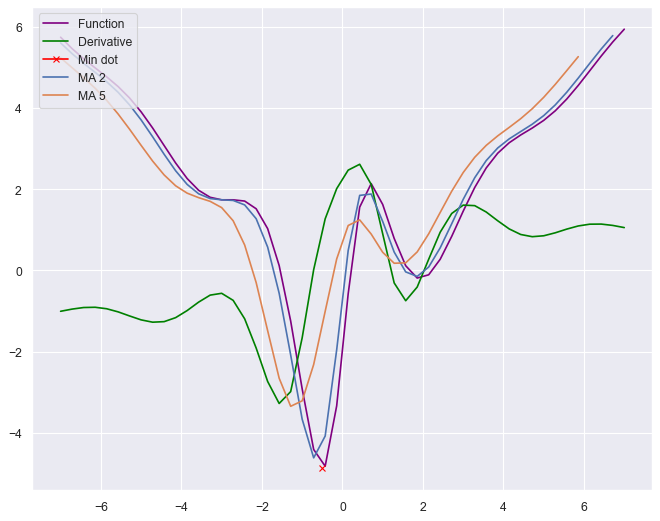

In [405]:
# importing the library
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import minimize
import numpy as np

from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

NUMBER_OF_POINTS = 50
  
# defining the function
def function(x):
    return (5*np.sin(2*x) - np.cos(x)**2 - 1 + np.abs(x**3) - x**2) / (x**2 + 1)
  
# calculating its derivative
def deriv(x):
    return derivative(function, x)

# find min dot
minimize_info =  minimize(function, x0=-1)
y_min = minimize_info['fun']
x_min = minimize_info['x'][0]
  
# defininf x-axis intervals
y = np.linspace(-7, 7, NUMBER_OF_POINTS)
x = function(y)
  
# plotting the function
plt.plot(y, x, color='purple', label='Function')
  
# plotting its derivative
plt.plot(y, deriv(y), color='green', label='Derivative')

# plotting the minimum dot
plt.plot(x_min, y_min, color="red", marker="x", label="Min dot")

# plotting its MA 2, 5
plt.plot(y[:-1], moving_average(x, 2), label='MA 2')
plt.plot(y[:-4], moving_average(x, 5), label='MA 5')
  
# formatting
plt.legend(loc='upper left')
plt.grid(True)

MA 1 нет смысла строить, так как это тот же самый график

Вид графика очень зависит от того, сколько точек строить
Если очень хочется, чтобы точка минимума совпала с графиком увеличьте кол-во точек (например до 500). Но тогда пропадет смысл в MA

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [311]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 0, 0, 4, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [444]:
def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    """Yet another sample algorithm.

    Args:
        x (npt.NDArray[int]): original vector
        c (int): number of samples

    Returns:
        npt.NDArray[int]: indexes from original vector that were selected
    """
    if len(x) < 0:
        raise ValueError("Vector length must be > 0")

    random_values = np.random.rand(c) * x.sum()
    random_values = random_values.reshape(-1, 1)
    
    cumsums = np.cumsum(x).reshape(1, -1)
    cumsums = np.repeat(cumsums, c, axis=0)

    mask = cumsums < random_values
    return mask.sum(axis=1)


np_sample(np.array([50, 3, 1, 7, 20]), 5)

array([0, 4, 4, 3, 0])

In [482]:
arr = np.random.randint(0, 50, size=(1000, ))
c = 1000

In [483]:
s1 = sample(arr, c)
s2 = np_sample(arr, c)

v1 = arr[s1]
v2 = arr[s2]

Построим сначала гистограмму распределения индексов и гистограмму распределения значений

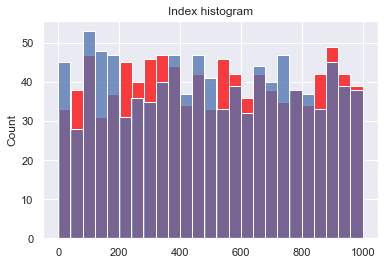

In [484]:
sns.histplot(s1, color='red', bins=25);
sns.histplot(s2, bins=25);
plt.title("Index histogram");

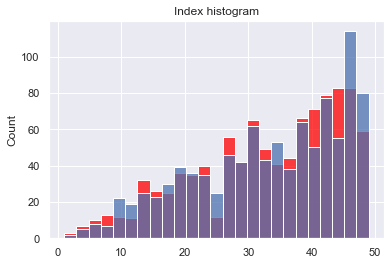

In [485]:
sns.histplot(v1, color='red', bins=25);
sns.histplot(v2, bins=25);
plt.title("Index histogram");

Судя по графикам семплы примерно одинаковые.

Чтобы убедится в равнозначности алгоритмов, проведем стат тест c уровнем значимости $\alpha = 0.05$. Для сравнение двух дискретных распределения большого размера подойдет ttest_ind

In [486]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(s1, s2)
print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")

t-test: statistic=0.7941, p-value=0.4273


Наше p-значение составляет 0,42, поэтому не отвергаем нулевую гипотезу об отсутствии различий в средних значениях в обеих группах.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [406]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position



In [313]:
%%timeit
walk(10_000)

3.83 ms ± 60.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [407]:
# ооооочень не эффективно по памяти, зато супер быстро по времени
def walk_2(n: int, steps=[-3, -1, 0, 2, 3]):
    return np.random.choice(steps, size=n).sum()


In [408]:
%%timeit
walk_2(10_000)

166 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [409]:
# еще один быстрый по времени, но ужасный по памяти способ запустить функцию 10_000 раз
walk_2_ufunc = np.frompyfunc(walk_2, 1, 1)
arr = walk_2_ufunc(np.random.randint(10000, 10001, size=(10_000,)))

<AxesSubplot:ylabel='Density'>

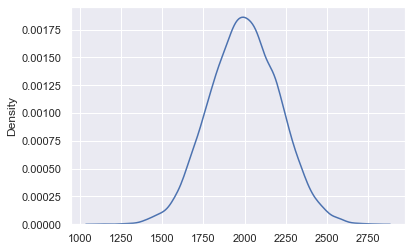

In [410]:
import seaborn as sns

sns.kdeplot(arr)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [318]:
def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


1.1785247402053611

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [319]:
%%timeit
strange_conv(a)

11.9 s ± 170 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [320]:
!pip install numba

In [321]:
from numba import jit

strange_conv_numba = jit(nopython=True)(strange_conv)

In [322]:
%%timeit
strange_conv_numba(a)

28 ms ± 80.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
